## Gradient Boosting Animation (Regression)
✔ Uses:

Decision stumps (max_depth=1)

Squared error loss

Step-by-step boosting

Smooth visualization

✅ FULL WORKING CODE

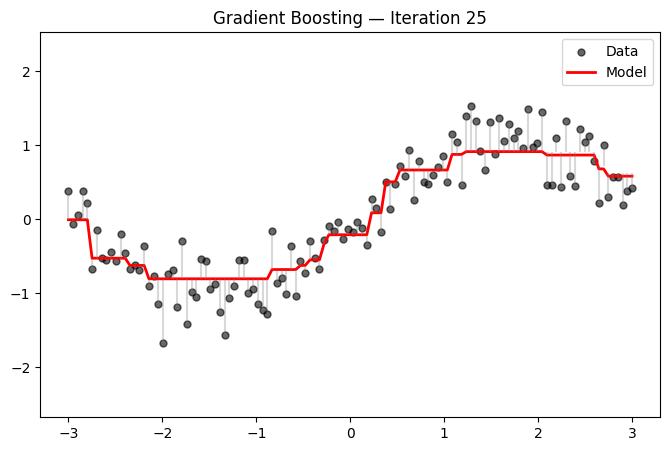

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from sklearn.tree import DecisionTreeRegressor

# ---------------------------------------------------
# Output directory
# ---------------------------------------------------
os.makedirs("gifs", exist_ok=True)

# ---------------------------------------------------
# Dataset
# ---------------------------------------------------
np.random.seed(0)
X = np.linspace(-3, 3, 120).reshape(-1, 1)
y = np.sin(X).ravel() + 0.3 * np.random.randn(len(X))

# ---------------------------------------------------
# Gradient Boosting parameters
# ---------------------------------------------------
n_estimators = 25
lr = 0.3

models = []
predictions = []
residuals = []

# Initial prediction
y_pred = np.zeros_like(y)
predictions.append(y_pred.copy())
residuals.append(y - y_pred)

# ---------------------------------------------------
# Train Gradient Boosting
# ---------------------------------------------------
for _ in range(n_estimators):
    model = DecisionTreeRegressor(max_depth=1)
    model.fit(X, residuals[-1])

    update = model.predict(X)
    y_pred = y_pred + lr * update

    models.append(model)
    predictions.append(y_pred.copy())
    residuals.append(y - y_pred)

# ---------------------------------------------------
# Plot setup
# ---------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))

x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

writer = PillowWriter(fps=2)

# ---------------------------------------------------
# Animation
# ---------------------------------------------------
with writer.saving(fig, "gifs/gradient_boosting.gif", dpi=120):

    for i in range(len(predictions)):
        ax.clear()

        # True data
        ax.scatter(X, y, s=25, color="black", alpha=0.6, label="Data")

        # Prediction curve
        y_hat_plot = predictions[i]
        ax.plot(X, y_hat_plot, color="red", linewidth=2, label="Model")

        # Residual arrows (optional, light)
        if i > 0:
            ax.vlines(
                X[:, 0],
                predictions[i - 1],
                y,
                color="gray",
                alpha=0.3
            )

        ax.set_title(f"Gradient Boosting — Iteration {i}")
        ax.set_ylim(y.min() - 1, y.max() + 1)
        ax.legend(loc="upper right")

        writer.grab_frame()

plt.show()
